In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df=pd.read_csv('TrainingData.csv')

In [3]:
print(df.isnull().any(axis='index').any())

False


In [4]:
df

,Unnamed: 0,district,HouseType,Building,Object status,Location of the house,Object location,House type,The floor,Usable area,Land area,Parking,Year of reconstruction,Water,Transport,Energy efficiency of the building,Equipment,Lift,companyName,proximityIndex,Index,Built-up area,Store,Garage,Gas,Garden area,Year of approval,Swimming pool,Floor area,Indicator of energy efficiency of the building,Certificate of energy performance of the building,Barrier-free,Housing costs,locationLat,locationLong,price,lokální plynové,heating_unknown,ústřední plynové,lokální tuhá paliva,jiné,lokální elektrické,ústřední tuhá paliva,ústřední elektrické,ústřední dálkové,podlahové,veřejná kanalizace,jímka,čov pro celý objekt,septik,garbage_unknown,230v,400v,electricity_unknown,120v,telecommunication_unknown,telefon,internet,kabelové rozvody,satelit,kabelová televize,communication_unknown,asfaltová,neupravená,dlážděná,zpevněná,provize,právního,dph,poplatků,cena k jednání,Land areaNan,Year of reconstructionNan,Built-up areaNan,Garden areaNan,Year of approvalNan,Floor areaNan
0,151,cheb,chalupy\n,Cihlová,Velmi dobrý,Missing,Missing,Patrový,2,0.616728,0.633977,1.0,0.74997,Studna,Missing,Třída G - Mimořádně nehospodárná č. 78/2013 Sb. podle vyhlášky,1,Missing,ERA Home Service,0.213542,154,0.685145,Missing,1.0,Missing,0.695238,0.953537,Missing,0.678655,Missing,Missing,Missing,Missing,49.9875604,12.874645217105748,0.626090,Missing,Missing,Missing,True,True,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,True,Missing,True,Missing,Missing,Missing,Missing,True,Missing,Missing,Missing,True,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,0,1,0,0,1,0
1,12063,brno,vily\n,Cihlová,Velmi dobrý,Samostatný,Okraj obce,Patrový,3,0.604357,0.559451,2.0,0.74997,"Dálkový vodovod, Studna","Silnice, MHD, Autobus",Třída D - Méně úsporná č. 78/2013 Sb. podle vyhlášky,Částečně,Missing,REAL OFFICE,0.773597,12462,0.629770,1,1.0,Plynovod,0.606301,0.953537,1.0,0.513962,"116,0 kWh/m^2 za rok",Missing,Missing,Missing,49.2774571,16.6095407,0.748401,Missing,Missing,True,True,Missing,Missing,Missing,Missing,Missing,Missing,True,Missing,Missing,Missing,Missing,Missing,Missing,True,Missing,True,Missing,Missing,Missing,Missing,Missing,Missing,True,Missing,True,Missing,True,True,Missing,Missing,Missing,0,1,0,0,1,1
2,9880,usti-nad-orlici,chalupy\n,Cihlová,Novostavba,Samostatný,Centrum obce,Patrový,3,0.510676,0.489206,Missing,0.74997,Dálkový vodovod,"Vlak, Silnice, Autobus",Třída G - Mimořádně nehospodárná č. 148/2007 Sb. podle vyhlášky,Missing,Missing,RE/MAX Dynamic,0.706973,10203,0.587688,9 m2,1.0,Missing,0.505504,0.953537,Missing,0.513962,Missing,Zobrazit průkaz energetické náročnosti budovy,Missing,Missing,50.0479103,16.5949808,0.548555,Missing,Missing,Missing,True,Missing,True,Missing,Missing,Missing,Missing,Missing,Missing,Missing,True,Missing,True,True,Missing,Missing,True,Missing,Missing,Missing,Missing,Missing,True,Missing,Missing,Missing,Missing,True,True,Missing,Missing,Missing,0,1,0,1,1,1
3,557,sokolov,rodinne-domy\n,Cihlová,Před rekonstrukcí,Samostatný,Missing,Patrový,1,0.420574,0.457735,1.0,0.74997,Dálkový vodovod,Autobus,Třída G - Mimořádně nehospodárná,Missing,Missing,Dumrealit.cz Bonus,0.762569,565,0.440387,1,Missing,Missing,0.505504,0.953537,Missing,0.513962,Missing,Missing,Missing,Missing,50.3487052,12.5103994,0.342180,Missing,Missing,Missing,Missing,True,Missing,Missing,Missing,Missing,Missing,Missing,Missing,Missing,True,Missing,True,Missing,Missing,Missing,True,Missing,Missing,Missing,Missing,Missing,True,Missing,Missing,Missing,Missing,True,True,Missing,Missing,Missing,0,1,0,1,1,1
4,9011,zdar-nad-sazavou,chaty\n,Dřevěná,Dobrý,Samostatný,Klidná část obce,Přízemní,1. podlaží z celkem 1,0.344780,0.510256,1.0,0.74997,"Místní zdroj, Dálkový vodovod","Silnice, Autobus",Missing,1,Missing,Fincentrum Reality,0.807311,9311,0.414121,Missing,Missing,Plynovod,0.505504,0.953537,Missing,0.513962,Missing,Missing,Missing,Missing,49.4705755,16

Checks if there are any missing values in any of the columns of the dataframe.

In [5]:
X = df.loc[df['locationLat'] != 'Unknown', ['locationLat','locationLong']]
y = df.loc[df['locationLat'] != 'Unknown', 'price']

In [6]:
# X = X.loc[:, [x for x in X.columns if x not in ['Index', 'Unnamed: 0', 'link', 'location']]]

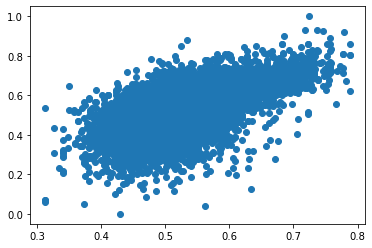

In [16]:
from sklearn.neighbors import KNeighborsRegressor
mod = KNeighborsRegressor(n_neighbors = 19)
mod.fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

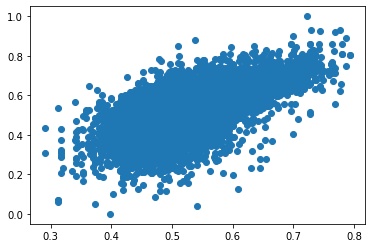

In [17]:
from sklearn.neighbors import KNeighborsRegressor
mod = KNeighborsRegressor(n_neighbors = 8)
mod.fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

In [8]:
KNeighborsRegressor().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [9]:
from sklearn.model_selection import GridSearchCV
grMod = GridSearchCV(estimator=KNeighborsRegressor(),
                 param_grid={
                   'n_neighbors': [n for n in range(2,35)]
                 },
                 cv=10)
grMod.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                         14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                         24, 25, 26, 27, 28, 29, 30, 31, ...]})

In [10]:
pd.DataFrame(grMod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006256,0.000955,0.003358,0.000357,2,{'n_neighbors': 2},0.153824,0.117842,0.196069,0.075561,0.129710,0.090908,0.141780,0.047172,0.100400,0.162043,0.121531,0.042139,33
1,0.005752,0.000056,0.003305,0.000061,3,{'n_neighbors': 3},0.192247,0.173142,0.226853,0.162472,0.198366,0.158838,0.219038,0.151231,0.171088,0.268407,0.192168,0.035001,32
2,0.005820,0.000063,0.003590,0.000211,4,{'n_neighbors': 4},0.233883,0.219820,0.235359,0.209571,0.250961,0.185258,0.234612,0.204855,0.199297,0.281554,0.225517,0.026569,31
3,0.005921,0.000139,0.003865,0.000426,5,{'n_neighbors': 5},0.277334,0.235003,0.250139,0.227424,0.254347,0.200251,0.267227,0.245650,0.216188,0.296189,0.246975,0.027343,30
4,0.005900,0.000105,0.003884,0.000112,6,{'n_neighbors': 6},0.295319,0.253034,0.257332,0.244157,0.263964,0.205029,0.268568,0.262451,0.221305,0.313029,0.258419,0.029925,29
5,0.005864,0.000072,0.004004,0.000088,7,{'n_neighbors': 7},0.301483,0.260559,0.259402,0.241763,0.285060,0.220894,0.274388,0.273093,0.212332,0.320258,0.264923,0.032017,28
6,0.005852,0.000064,0.004125,0.000078,8,{'n_neighbors': 8},0.305336,0.264502,0.265640,0.237146,0.291287,0.225143,0.282628,0.276419,0.224784,0.327150,0.270003,0.032177,27
7,0.005985,0.000371,0.004286,0.000129,9,{'n_neighbors': 9},0.301817,0.267162,0.272786,0.241011,0.296611,0.233443,0.287444,0.276920,0.225457,0.341796,0.274445,0.033476,26
8,0.005851,0.000058,0.004422,0.000085,10,{'n_neighbors': 10},0.309750,0.266593,0.267394,0.240894,0.312180,0.237544,0.289993,0.280708,0.229466,0.347407,0.278193,0.035716,25
9,0.006354,0.000999,0.004871,0.000580,11,{'n_neighbors': 11},0.313110,0.269441,0.269192,0.239800,0.312419,0.248456,0.293283,0.275072,0.235861,0.345564,0.280220,0.033814,24


In [11]:
# column_trans = make_column_transformer(
#     (OneHotEncoder(), categoricalFeatures),
#     remainder='passthrough')

In [12]:
#feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
# pipe = make_pipeline(column_trans, Lasso(alpha=0.005, random_state=0))
# pipe.fit(X, y)

In [13]:
# selected_feat = X.columns[(pipe.get_support())]

In [14]:
# print('total features: {}'.format((X.shape[1])))
# print('selected features: {}'.format(len(selected_feat)))